# Library Imports
- This will import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sets up the data sets to be used

# data source:
# https://catalog.data.gov/dataset/illinois-population-1991-1999-30290
old_data = pd.read_csv('data/Illinois_Population__1991-1999.csv')

# data source:
# https://catalog.data.gov/dataset/illinois-population-2000-2009-b6d2b
new_data = pd.read_csv('data/Illinois_Population__2000-2009.csv')

## Helper Functions in the Code Cells Below

In [3]:
# returns the first row in CSV (the header)

def return_year_list(data_set):
    first_row = list(data_set.head(1))[1:]
    return np.array(list(map(int, first_row)))

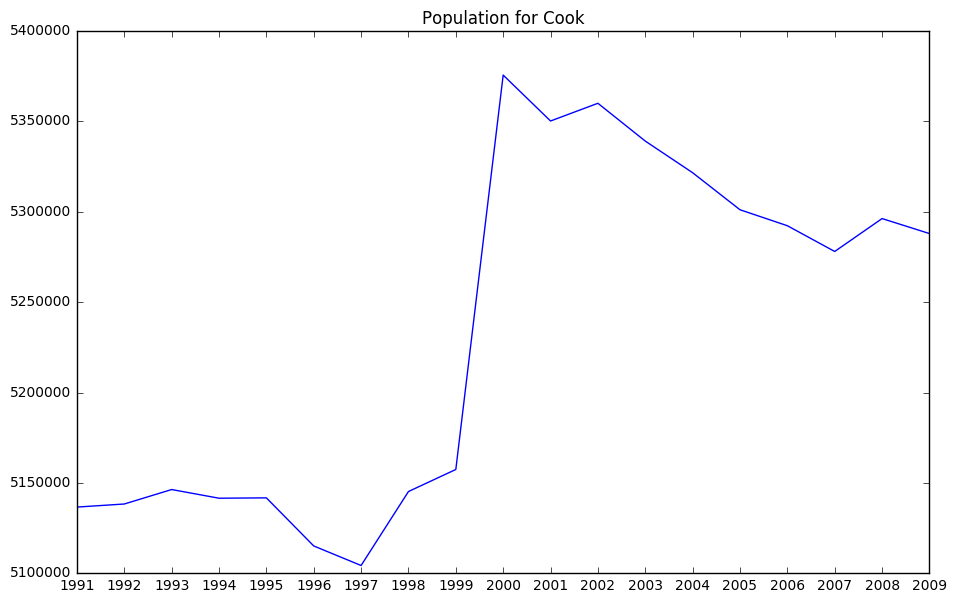

In [37]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = float(11)
fig_size[1] = float(7)
plt.rcParams["figure.figsize"] = fig_size
x_axis_old = return_year_list(old_data)
x_axis_new = return_year_list(new_data)
x = [i for i in range(19)]
years_list = np.array(list(x_axis_old) + list(x_axis_new))
row_old = list(old_data.loc[16])
row_new = list(new_data.loc[16])
city_name = row_old[0]
del row_new[0]
city_pop = row_old[1:] + row_new[:]
city_pop = [float(i) for i in city_pop]
plt.title('Population for ' + str(city_name))
plt.xticks(x, years_list)
plt.plot(city_pop)
plt.show()